<a href="https://colab.research.google.com/github/neerabhi/Computer_vision/blob/main/Experimant_2(Scratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part-I

Loaded Original image

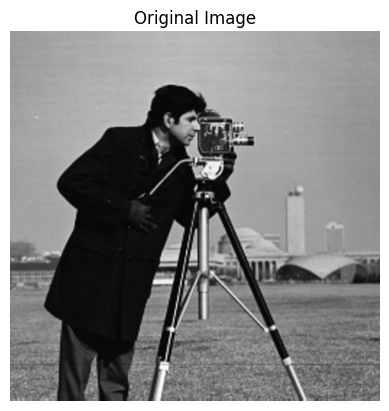

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.util import random_noise
from scipy.ndimage import gaussian_laplace, maximum_filter
from skimage.feature import canny

# File path (ensure file exists in this location)
file_path = r"/content/cameraman.tif"

# Read image in grayscale
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Check if image loaded successfully
if img is None:
    raise FileNotFoundError(f"Image not found at {file_path}")

# Display the original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


Function for calculating PSNR and adding salt pepper noise to the image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# ---------- PSNR ----------
def psnr(img1, img2):
    mse = np.mean((img1.astype(np.float64) - img2.astype(np.float64)) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

# ---------- Salt & Pepper Noise ----------
def salt_pepper_noise(image, prob=0.02):
    noisy = image.copy()
    h, w, c = noisy.shape
    rnd = np.random.rand(h, w)
    noisy[rnd < (prob / 2)] = 0
    noisy[rnd > 1 - (prob / 2)] = 255
    return noisy

# ---------- Wrapping Function ----------
def wrappingImage(img, kernelSize : int):
    w = kernelSize // 2
    fetchFirstRows = img[0:w, :]
    fetchLastRows = img[-w:, :]

    imgWrapped = img.copy()
    imgWrapped = np.insert(imgWrapped, 0, fetchLastRows, axis=0)
    imgWrapped = np.append(imgWrapped, fetchFirstRows, axis=0)

    fetchFirstCols = imgWrapped[:, 0:w]
    fetchLastCols = imgWrapped[:, -w:]
    imgWrapped = np.concatenate([fetchLastCols, imgWrapped], axis=1)
    imgWrapped = np.append(imgWrapped, fetchFirstCols, axis=1)

    return imgWrapped

In [ ]:
# Load image
img_path = r"/content/cameraman.tif"
img = cv2.imread(img_path)

# Add Salt & Pepper Noise
noisy_img = salt_pepper_noise(img, prob=0.05)

Mean Filter

PSNR (Original vs Noisy): 18.00 dB
PSNR (Original vs Filtered): 26.34 dB


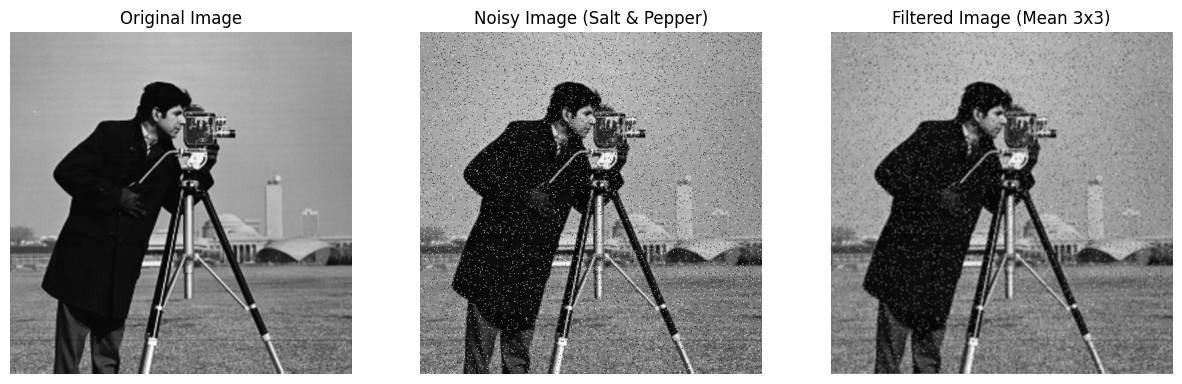

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ---------- Mean Filter ----------
def meanFilter(orginalImg, wrappedImage, kernelSize : int):
    filteredImage = np.zeros(orginalImg.shape, dtype=np.uint8)
    image_h, image_w = orginalImg.shape[0], orginalImg.shape[1]
    w = kernelSize // 2

    for i in range(w, image_h + w):
        for j in range(w, image_w + w):
            total = [0, 0, 0]
            for m in range(kernelSize):
                for n in range(kernelSize):
                    total += wrappedImage[i - w + m][j - w + n]
            filteredImage[i - w][j - w] = total // (kernelSize * kernelSize)
    return filteredImage


# ---------- Main ---------
# Apply mean filter (3x3)
kernel_size = 3
wrapped = wrappingImage(noisy_img, kernel_size)
filtered_img = meanFilter(noisy_img, wrapped, kernel_size)

# Calculate PSNR
psnr_noisy = psnr(img, noisy_img)
psnr_filtered = psnr(img, filtered_img)

print(f"PSNR (Original vs Noisy): {psnr_noisy:.2f} dB")
print(f"PSNR (Original vs Filtered): {psnr_filtered:.2f} dB")

# Display images
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image (Salt & Pepper)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.title("Filtered Image (Mean 3x3)")
plt.axis("off")

plt.show()


Median Filter

PSNR (Original vs Noisy): 18.00 dB
PSNR (Original vs Filtered): 35.58 dB


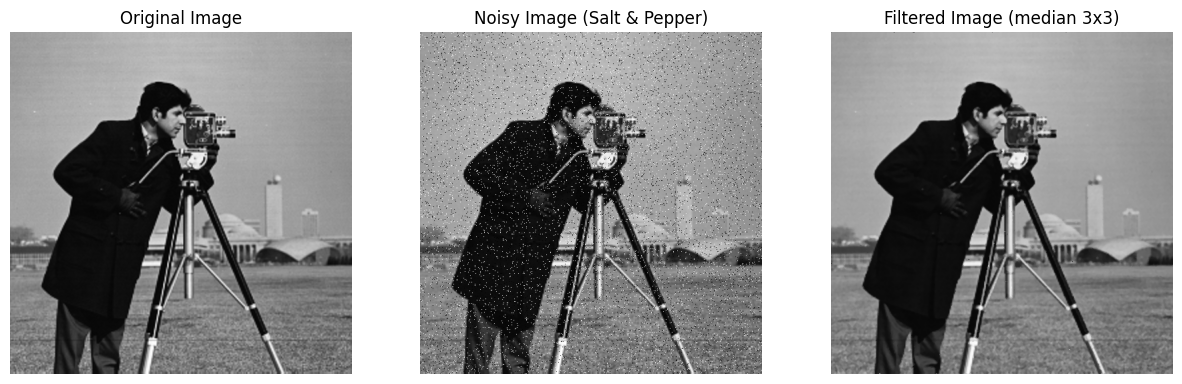

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ---------- Mean Filter ----------
def medianFilter(orginalImg, wrappedImage, kernelSize: int):
    filteredImage = np.zeros(orginalImg.shape, dtype=np.uint8)
    image_h, image_w = orginalImg.shape[0], orginalImg.shape[1]
    w = kernelSize // 2

    for i in range(w, image_h + w):   # go through image
        for j in range(w, image_w + w):
            overlapImg = wrappedImage[i - w : i + w + 1, j - w : j + w + 1]
            median_val = np.median(overlapImg.reshape(-1, 3), axis=0)
            filteredImage[i - w, j - w] = median_val.astype(np.uint8)

    return filteredImage


# ---------- Main ---------
# Apply mean filter (3x3)
kernel_size = 3
wrapped = wrappingImage(noisy_img, kernel_size)
filtered_img = medianFilter(noisy_img, wrapped, kernel_size)

# Calculate PSNR
psnr_noisy = psnr(img, noisy_img)
psnr_filtered = psnr(img, filtered_img)

print(f"PSNR (Original vs Noisy): {psnr_noisy:.2f} dB")
print(f"PSNR (Original vs Filtered): {psnr_filtered:.2f} dB")

# Display images
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image (Salt & Pepper)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.title("Filtered Image (median 3x3)")
plt.axis("off")

plt.show()


Gausssian filter

PSNR (Original vs Noisy): 18.00 dB
PSNR (Original vs Gaussian Filtered): 25.81 dB


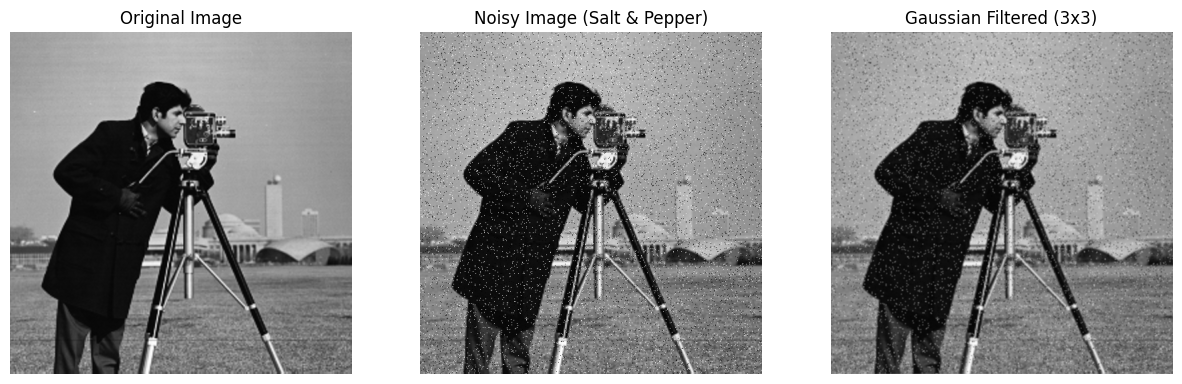

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ---------- Convolution (for Gaussian filter) ----------
def applyGaussianFilter(originalImg, wrappedImage, kernel):
    filteredImage = np.zeros(originalImg.shape, dtype=np.uint8)
    image_h, image_w = originalImg.shape[0], originalImg.shape[1]
    k = kernel.shape[0]  # assuming square kernel
    w = k // 2

    for i in range(w, image_h + w):
        for j in range(w, image_w + w):
            # extract patch
            overlapImg = wrappedImage[i - w : i + w + 1, j - w : j + w + 1]

            # apply kernel per channel
            conv_val = []
            for c in range(3):  # BGR channels
                region = overlapImg[:, :, c]
                conv_val.append(np.sum(region * kernel))
            filteredImage[i - w, j - w] = np.clip(conv_val, 0, 255)

    return filteredImage


# ---------- Gaussian Kernel (3x3, σ=1) ----------
gaussian_kernel = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32)

# ---------- Main ----------
kernel_size = 3
wrapped = wrappingImage(noisy_img, kernel_size)   # use your same wrapping
filtered_img = applyGaussianFilter(noisy_img, wrapped, gaussian_kernel)

# Calculate PSNR
psnr_noisy = psnr(img, noisy_img)
psnr_filtered = psnr(img, filtered_img)

print(f"PSNR (Original vs Noisy): {psnr_noisy:.2f} dB")
print(f"PSNR (Original vs Gaussian Filtered): {psnr_filtered:.2f} dB")

# Display images
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image (Salt & Pepper)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Filtered (3x3)")
plt.axis("off")

plt.show()


**Part-II**

Laplacian Filter

PSNR (Original vs Noisy): 18.00 dB
PSNR (Original vs Laplacian Filtered): 6.17 dB


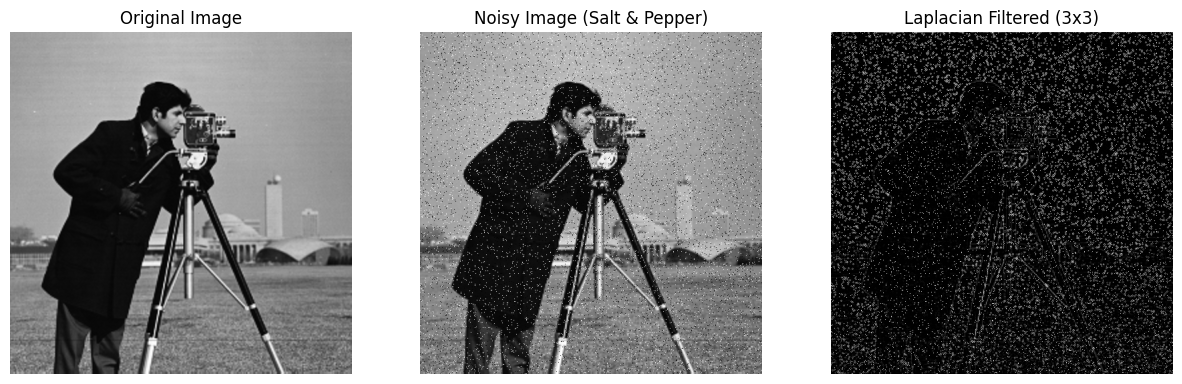

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ---------- Convolution (for Laplacian filter) ----------
def applyLaplacianFilter(originalImg, wrappedImage, kernel):
    filteredImage = np.zeros(originalImg.shape, dtype=np.uint8)
    image_h, image_w = originalImg.shape[0], originalImg.shape[1]
    k = kernel.shape[0]  # assuming square kernel
    w = k // 2

    for i in range(w, image_h + w):
        for j in range(w, image_w + w):
            # extract patch
            overlapImg = wrappedImage[i - w : i + w + 1, j - w : j + w + 1]

            # apply kernel per channel
            conv_val = []
            for c in range(3):  # BGR channels
                region = overlapImg[:, :, c]
                conv_val.append(np.sum(region * kernel))
            filteredImage[i - w, j - w] = np.clip(conv_val, 0, 255)

    return filteredImage


laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)

# ---------- Main ----------
kernel_size = 3
wrapped = wrappingImage(noisy_img, kernel_size)   # use your same wrapping
filtered_img = applyLaplacianFilter(noisy_img, wrapped, laplacian_kernel)

# Calculate PSNR
psnr_noisy = psnr(img, noisy_img)
psnr_filtered = psnr(img, filtered_img)

print(f"PSNR (Original vs Noisy): {psnr_noisy:.2f} dB")
print(f"PSNR (Original vs Laplacian Filtered): {psnr_filtered:.2f} dB")

# Display images
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image (Salt & Pepper)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
plt.title("Laplacian Filtered (3x3)")
plt.axis("off")

plt.show()


Sober filter

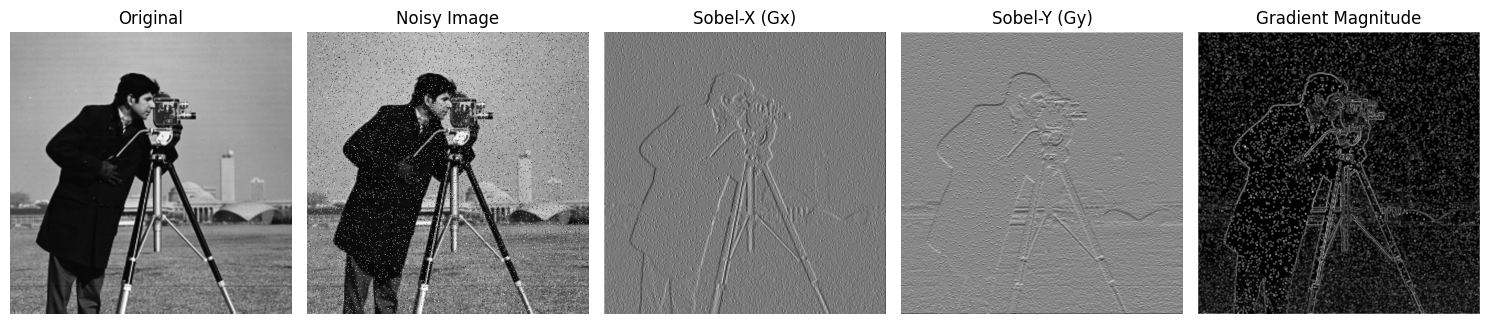

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Sobel Kernels ----------
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]], dtype=np.float32)

# ---------- Manual 2D Convolution ----------
def convolve2d(img, kernel):
    m, n = kernel.shape
    pad = m // 2
    # grayscale
    if img.ndim == 2:
        padded = np.pad(img, ((pad, pad), (pad, pad)), mode="constant")
        result = np.zeros_like(img, dtype=np.float32)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                region = padded[i:i+m, j:j+n]
                result[i, j] = np.sum(region * kernel)
        return result
    # color image (apply per channel)
    elif img.ndim == 3:
        result = np.zeros_like(img, dtype=np.float32)
        for c in range(img.shape[2]):
            padded = np.pad(img[:,:,c], ((pad,pad),(pad,pad)), mode="constant")
            for i in range(img.shape[0]):
                for j in range(img.shape[1]):
                    region = padded[i:i+m, j:j+n]
                    result[i, j, c] = np.sum(region * kernel)
        return result

# ---------- Normalize helper ----------
def normalize(arr):
    arr = arr.astype(np.float32)
    return ((arr - arr.min()) / (arr.max() - arr.min() + 1e-8) * 255).astype(np.uint8)

# ---------- Apply Sobel Filters on Noisy Image ----------
Gx = convolve2d(noisy_img, sobel_x)
Gy = convolve2d(noisy_img, sobel_y)

# Gradient Magnitude
G = np.sqrt(Gx.astype(np.float32)**2 + Gy.astype(np.float32)**2)

# Normalize for visualization
Gx = normalize(Gx)
Gy = normalize(Gy)
G  = normalize(G)

# ---------- Display ----------
plt.figure(figsize=(15, 6))

plt.subplot(1, 5, 1)
plt.imshow(img, cmap="gray" if img.ndim==2 else None)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(noisy_img, cmap="gray" if noisy_img.ndim==2 else None)
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(Gx, cmap="gray")
plt.title("Sobel-X (Gx)")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(Gy, cmap="gray")
plt.title("Sobel-Y (Gy)")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(G, cmap="gray")
plt.title("Gradient Magnitude")
plt.axis("off")

plt.tight_layout()
plt.show()


**Prewitt Filter**

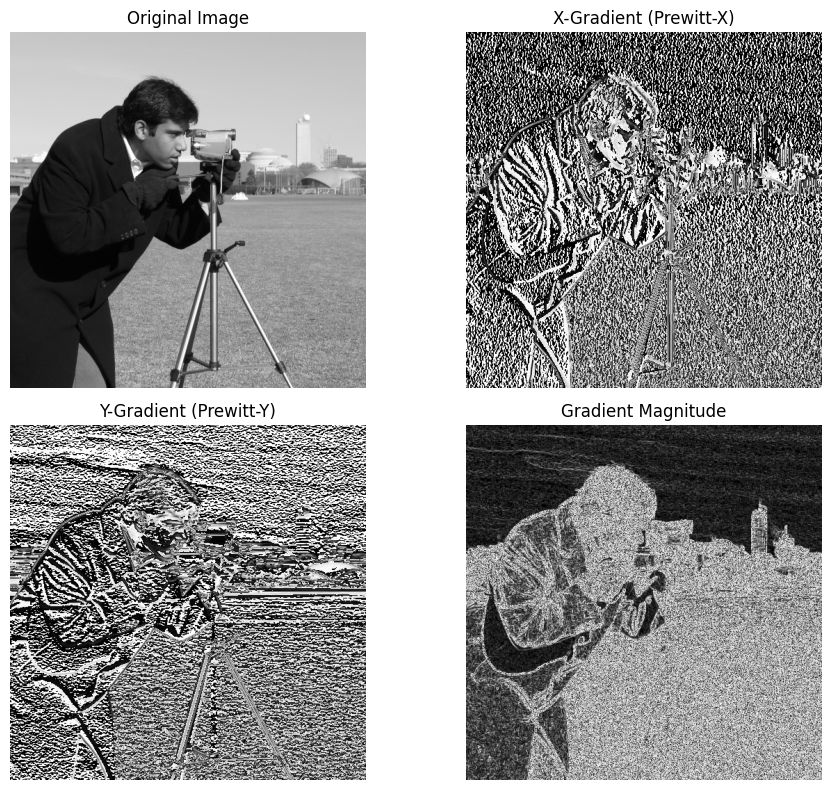

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from skimage import color, data

# Load a sample image and convert to grayscale
image = data.camera()
# image = color.rgb2gray(data.astronaut()) # Alternative image

# Define Prewitt kernels
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

# Apply the filters
grad_x = ndimage.convolve(image, prewitt_x)
grad_y = ndimage.convolve(image, prewitt_y)

# Compute gradient magnitude
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Display results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(grad_x, cmap='gray')
axes[0, 1].set_title('X-Gradient (Prewitt-X)')
axes[0, 1].axis('off')

axes[1, 0].imshow(grad_y, cmap='gray')
axes[1, 0].set_title('Y-Gradient (Prewitt-Y)')
axes[1, 0].axis('off')

axes[1, 1].imshow(grad_magnitude, cmap='gray')
axes[1, 1].set_title('Gradient Magnitude')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

**Part-III**

Canny Edge detection:
Canny filter is made of three steps:

Noise reduction;

Gradient calculation;

Non-maximum suppression;

Double threshold;

Edge Tracking by Hysteresis.

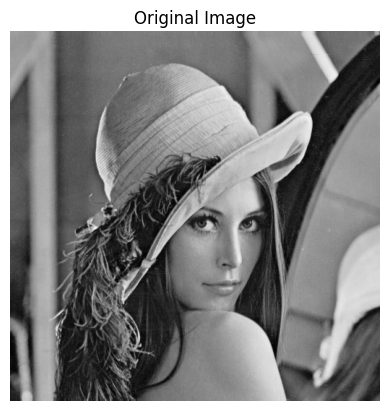

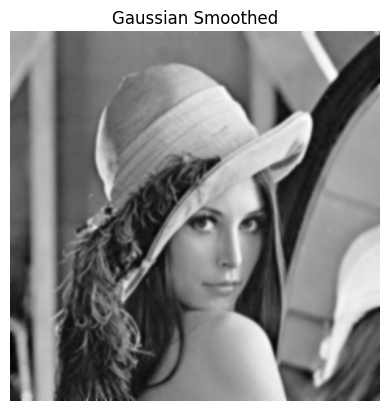

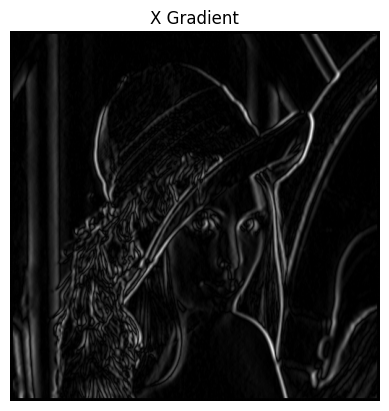

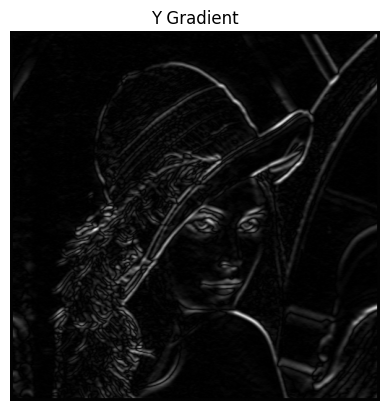

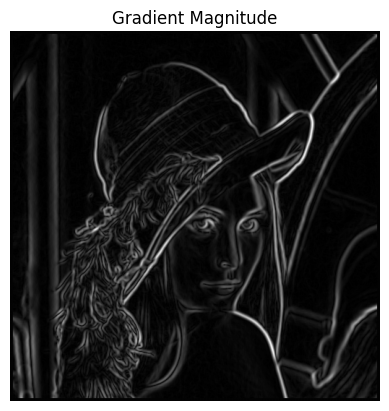

Number of Edge pixels: 49795


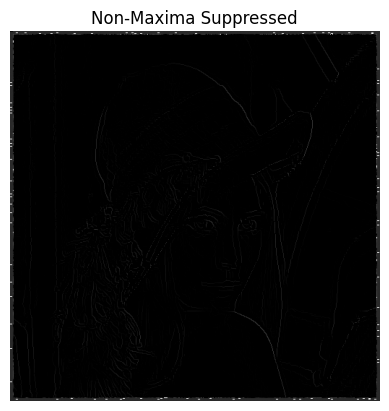

For 10% - Threshold gray level value: 16


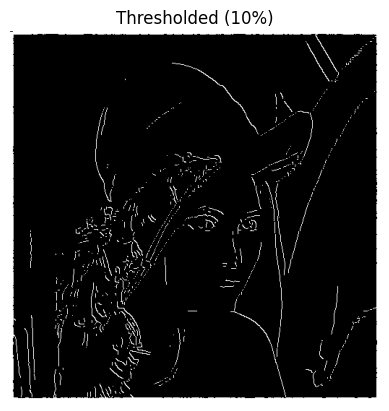

For 30% - Threshold gray level value: 4


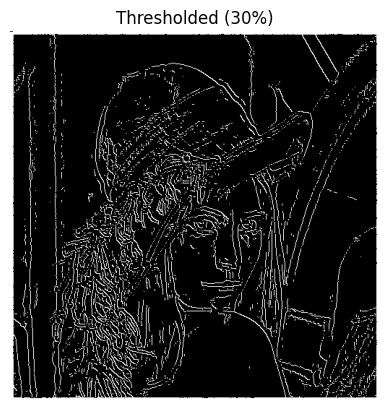

For 50% - Threshold gray level value: 2


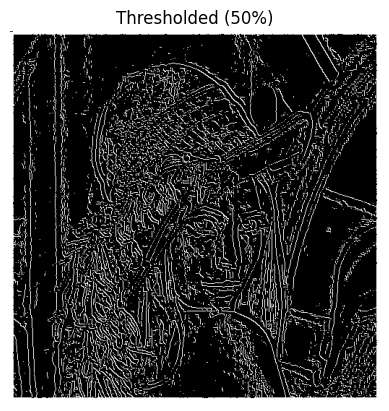

In [ ]:
import math
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt


def show_image(img, title="Image"):
    """Helper to show images inline with matplotlib"""
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


def gaussianSmoothing(image):
    """Applies 7x7 Gaussian Filter to the image by convolution operation"""
    imageArray = np.array(image)
    gaussianArr = np.array(image)
    for i in range(3, image.shape[0] - 3):
        for j in range(3, image.shape[1] - 3):
            gaussianArr[i][j] = applyGaussianFilterAtPoint(imageArray, i, j)
    return gaussianArr


def applyGaussianFilterAtPoint(imageData, row, column):
    val = 0
    for i in range(row - 3, row + 4):
        for j in range(column - 3, column + 4):
            val += gaussian_filter[i - row + 3][j - column + 3] * imageData[i][j]
    return val


def getGradientX(imgArr, height, width):
    imageData = np.empty(shape=(height, width))
    for i in range(3, height - 5):
        for j in range(3, imgArr[i].size - 5):
            if liesInUnderRegion(imgArr, i, j):
                imageData[i + 1][j + 1] = 0
            else:
                imageData[i + 1][j + 1] = prewittAtX(imgArr, i, j)
    return abs(imageData)


def getGradientY(imgArr, height, width):
    imageData = np.empty(shape=(height, width))
    for i in range(3, height - 5):
        for j in range(3, imgArr[i].size - 5):
            if liesInUnderRegion(imgArr, i, j):
                imageData[i + 1][j + 1] = 0
            else:
                imageData[i + 1][j + 1] = prewittAtY(imgArr, i, j)
    return abs(imageData)


def getMagnitude(Gx, Gy, height, width):
    gradientData = np.empty(shape=(height, width))
    for row in range(height):
        for column in range(width):
            gradientData[row][column] = ((Gx[row][column] ** 2 + Gy[row][column] ** 2) ** 0.5) / 1.4142
    return gradientData


def getAngle(Gx, Gy, height, width):
    gradientData = np.empty(shape=(height, width))
    for i in range(height):
        for j in range(width):
            if Gx[i][j] == 0:
                angle = 90 if Gy[i][j] > 0 else -90
            else:
                angle = math.degrees(math.atan(Gy[i][j] / Gx[i][j]))
            if angle < 0:
                angle += 360
            gradientData[i][j] = angle
    return gradientData


def localMaximization(gradientData, gradientAngle, height, width):
    gradient = np.empty(shape=(height, width))
    numberOfPixels = np.zeros(shape=(256))
    edgePixels = 0

    for row in range(5, height - 5):
        for col in range(5, image[row].size - 5):
            theta = gradientAngle[row, col]
            gradientAtPixel = gradientData[row, col]
            value = 0

            if (0 <= theta <= 22.5 or 157.5 < theta <= 202.5 or 337.5 < theta <= 360):
                if gradientAtPixel > gradientData[row, col + 1] and gradientAtPixel > gradientData[row, col - 1]:
                    value = gradientAtPixel
            elif (22.5 < theta <= 67.5 or 202.5 < theta <= 247.5):
                if gradientAtPixel > gradientData[row + 1, col - 1] and gradientAtPixel > gradientData[row - 1, col + 1]:
                    value = gradientAtPixel
            elif (67.5 < theta <= 112.5 or 247.5 < theta <= 292.5):
                if gradientAtPixel > gradientData[row + 1, col] and gradientAtPixel > gradientData[row - 1, col]:
                    value = gradientAtPixel
            elif 112.5 < theta <= 157.5 or 292.5 < theta <= 337.5:
                if gradientAtPixel > gradientData[row + 1, col + 1] and gradientAtPixel > gradientData[row - 1, col - 1]:
                    value = gradientAtPixel

            gradient[row, col] = value

            if value > 0:
                edgePixels += 1
                try:
                    numberOfPixels[int(value)] += 1
                except:
                    pass

    print('Number of Edge pixels:', edgePixels)
    return [gradient, numberOfPixels, edgePixels]


def pTile(percent, imageData, numberOfPixels, edgePixels):
    threshold = np.around(edgePixels * percent / 100)
    sum, value = 0, 255
    for value in range(255, 0, -1):
        sum += numberOfPixels[value]
        if sum >= threshold:
            break

    for i in range(imageData.shape[0]):
        for j in range(imageData[i].size):
            imageData[i, j] = 255 if imageData[i, j] >= value else 0

    print(f"For {percent}% - Threshold gray level value: {value}")
    show_image(imageData, f"Thresholded ({percent}%)")
    return imageData


def liesInUnderRegion(imgArr, i, j):
    return (imgArr[i][j] is None or imgArr[i][j + 1] is None or imgArr[i][j - 1] is None or
            imgArr[i + 1][j] is None or imgArr[i + 1][j + 1] is None or imgArr[i + 1][j - 1] is None or
            imgArr[i - 1][j] is None or imgArr[i - 1][j + 1] is None or imgArr[i - 1][j - 1] is None)


def prewittAtX(imageData, row, column):
    horizontal = 0
    for i in range(0, 3):
        for j in range(0, 3):
            horizontal += imageData[row + i, column + j] * prewittX[i, j]
    return horizontal


def prewittAtY(imageData, row, column):
    vertical = 0
    for i in range(0, 3):
        for j in range(0, 3):
            vertical += imageData[row + i, column + j] * prewittY[i, j]
    return vertical


if __name__ == "__main__":

    gaussian_filter = (1.0 / 140.0) * np.array([[1, 1, 2, 2, 2, 1, 1],
                                                [1, 2, 2, 4, 2, 2, 1],
                                                [2, 2, 4, 8, 4, 2, 2],
                                                [2, 4, 8, 16, 8, 4, 2],
                                                [2, 2, 4, 8, 4, 2, 2],
                                                [1, 2, 2, 4, 2, 2, 1],
                                                [1, 1, 2, 2, 2, 1, 1]])

    prewittX = (1.0 / 3.0) * np.array([[-1, 0, 1],
                                       [-1, 0, 1],
                                       [-1, 0, 1]])
    prewittY = (1.0 / 3.0) * np.array([[1, 1, 1],
                                       [0, 0, 0],
                                       [-1, -1, -1]])

    # Read Image
    image = cv2.imread('/content/lena_gray_512.tif', 0)
    show_image(image, "Original Image")

    height, width = image.shape

    # Gaussian Smoothing
    gaussianData = gaussianSmoothing(image)
    show_image(gaussianData, "Gaussian Smoothed")

    # Horizontal & Vertical Gradients
    Gx = getGradientX(gaussianData, height, width)
    show_image(Gx, "X Gradient")
    Gy = getGradientY(gaussianData, height, width)
    show_image(Gy, "Y Gradient")

    # Gradient Magnitude
    gradient = getMagnitude(Gx, Gy, height, width)
    show_image(gradient, "Gradient Magnitude")

    # Edge Angle
    gradientAngle = getAngle(Gx, Gy, height, width)

    # Non Maxima Suppression
    localMaxSuppressed = localMaximization(gradient, gradientAngle, height, width)
    suppressedImage = localMaxSuppressed[0]
    show_image(suppressedImage, "Non-Maxima Suppressed")

    numberOfPixels = localMaxSuppressed[1]
    edgePixels = localMaxSuppressed[2]

    # Apply p-Tile Thresholding
    pTile(10, np.copy(suppressedImage), numberOfPixels, edgePixels)
    pTile(30, np.copy(suppressedImage), numberOfPixels, edgePixels)
    pTile(50, np.copy(suppressedImage), numberOfPixels, edgePixels)


LOG


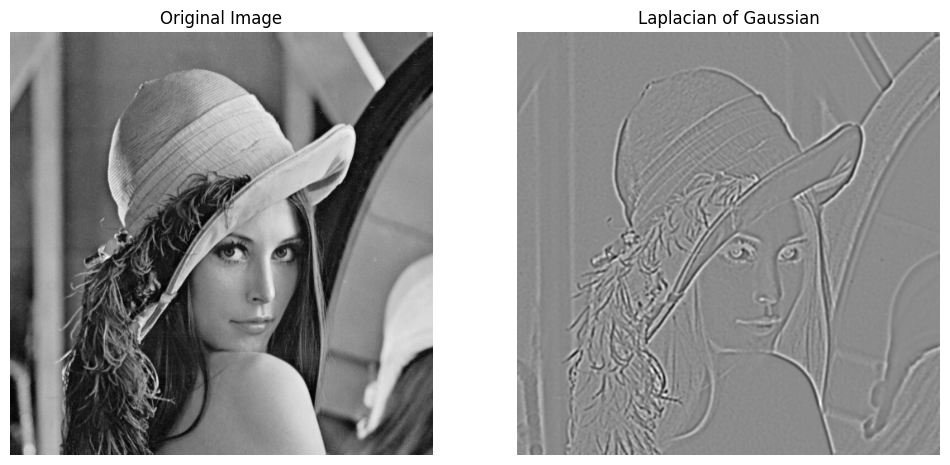

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy.signal import convolve2d

# Step 1: Gaussian Kernel
def gaussian_kernel(size, sigma=1):
    """Generate a Gaussian kernel."""
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

# Step 2: Laplacian Kernel
laplacian_kernel = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]])

# Step 3: LoG = Laplacian(Gaussian(image))
def laplacian_of_gaussian(image, size=5, sigma=1):
    # Gaussian smoothing
    gauss = gaussian_kernel(size, sigma)
    smoothed = convolve2d(image, gauss, mode="same", boundary="symm")

    # Apply Laplacian
    log_image = convolve2d(smoothed, laplacian_kernel, mode="same", boundary="symm")
    return log_image

# Load test image
image = cv2.imread('/content/lena_gray_512.tif', 0)

# Apply LoG
log_result = laplacian_of_gaussian(image, size=7, sigma=1.5)

# Step 4: Show results
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Laplacian of Gaussian")
plt.imshow(log_result, cmap="gray")
plt.axis("off")

plt.show()


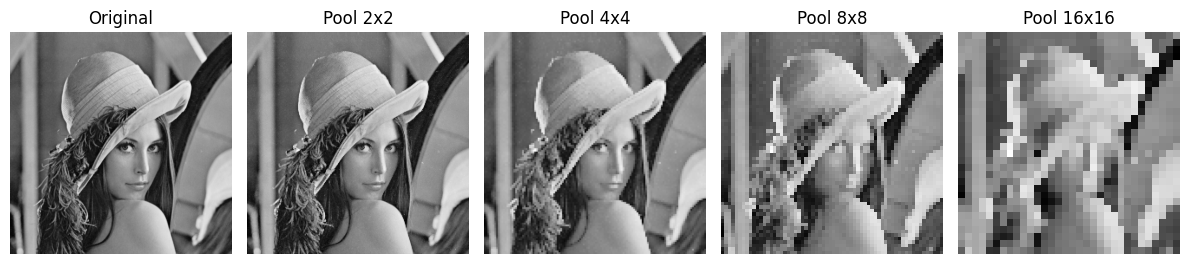

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def max_pooling(image, pool_size=2, stride=2):
    """
    Perform max pooling on a 2D image.
    """
    h, w = image.shape

    # Calculate output size
    out_h = (h - pool_size) // stride + 1
    out_w = (w - pool_size) // stride + 1

    pooled = np.zeros((out_h, out_w))

    for i in range(0, h - pool_size + 1, stride):
        for j in range(0, w - pool_size + 1, stride):
            region = image[i:i+pool_size, j:j+pool_size]
            pooled[i//stride, j//stride] = np.max(region)

    return pooled

# Load grayscale image
image = cv2.imread('/content/lena_gray_512.tif', 0)

# Different pool sizes to test
pool_sizes = [2, 4, 8, 16]

plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(1, len(pool_sizes)+1, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis("off")

# Apply pooling for each pool size
for idx, p in enumerate(pool_sizes, start=2):
    pooled = max_pooling(image, pool_size=p, stride=p)
    plt.subplot(1, len(pool_sizes)+1, idx)
    plt.title(f"Pool {p}x{p}")
    plt.imshow(pooled, cmap='gray')
    plt.axis("off")

plt.tight_layout()
plt.show()
